In [ ]:
Line Charts

Objectives

Track trends in compensation across age groups and specific age ranges.

Analyze job satisfaction trends based on experience level.

Explore and interpret line charts to identify patterns and trends.

In [1]:
!pip install pandas
!pip install matplotlib

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
df = pd.read_csv(url)

In [4]:
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


In [ ]:
Task 1: Trends in Compensation Over Age Groups
1. Line Chart of Median ConvertedCompYearly by Age Group
Track how the median yearly compensation (ConvertedCompYearly) changes across different age groups.

Use a line chart to visualize these trends.

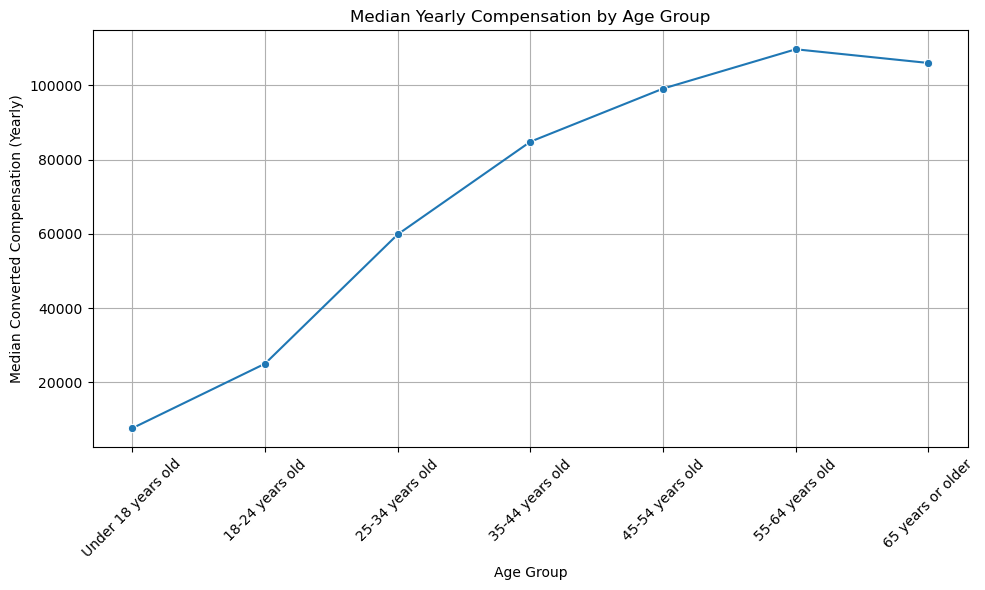

In [7]:
# Filter out rows where Age or ConvertedCompYearly is missing
df_filtered = df[['Age', 'ConvertedCompYearly']].dropna()

# Optional: Order Age groups logically (manual sort if necessary)
age_order = [
    'Under 18 years old', '18-24 years old', '25-34 years old',
    '35-44 years old', '45-54 years old', '55-64 years old',
    '65 years or older'
]

# Group by Age and compute median compensation
median_comp_by_age = df_filtered.groupby('Age')['ConvertedCompYearly'].median().reindex(age_order)

# Plot the line chart
plt.figure(figsize=(10, 6))
sns.lineplot(x=median_comp_by_age.index, y=median_comp_by_age.values, marker='o')
plt.title('Median Yearly Compensation by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Median Converted Compensation (Yearly)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
 Line Chart of Median ConvertedCompYearly for Ages 25 to 45
For a closer look, plot a line chart focusing on the median compensation for respondents between ages 25 and 45.


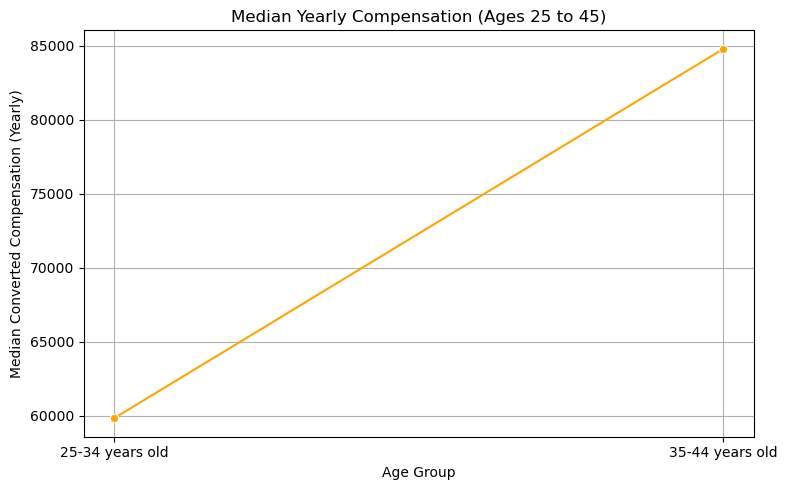

In [8]:
# Filter relevant columns and drop missing values
df_filtered = df[['Age', 'ConvertedCompYearly']].dropna()

# Focus on ages 25 to 45
target_ages = ['25-34 years old', '35-44 years old']
df_target = df_filtered[df_filtered['Age'].isin(target_ages)]

# Group by Age and compute median compensation
median_comp_target = df_target.groupby('Age')['ConvertedCompYearly'].median().reindex(target_ages)

# Plot the chart
plt.figure(figsize=(8, 5))
sns.lineplot(x=median_comp_target.index, y=median_comp_target.values, marker='o', color='orange')
plt.title('Median Yearly Compensation (Ages 25 to 45)')
plt.xlabel('Age Group')
plt.ylabel('Median Converted Compensation (Yearly)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
Task 2: Trends in Job Satisfaction by Experience Level
1. Line Chart of Job Satisfaction (JobSatPoints_6) by Experience Level
Use a column that approximates experience level to analyze how job satisfaction changes with experience.

If needed, substitute an available experience-related column for Experience.

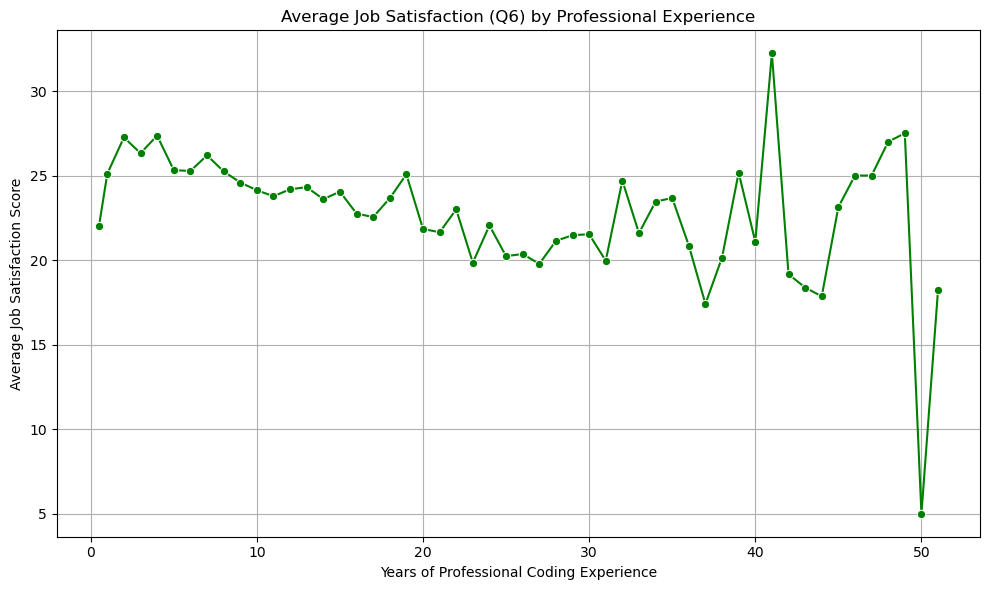

In [9]:
# Check available columns
# print(df.columns)  # Uncomment to inspect if needed

# Filter needed columns
if 'YearsCodePro' in df.columns:
    df_exp = df[['YearsCodePro', 'JobSatPoints_6']].dropna()

    # Normalize experience values
    df_exp['YearsCodePro'] = df_exp['YearsCodePro'].replace({
        'Less than 1 year': 0.5,
        'More than 50 years': 51
    })
    df_exp['YearsCodePro'] = pd.to_numeric(df_exp['YearsCodePro'], errors='coerce')

    # Drop rows with conversion errors
    df_exp = df_exp.dropna()

    # Group by Years of Experience and calculate average job satisfaction
    mean_job_sat = df_exp.groupby('YearsCodePro')['JobSatPoints_6'].mean()

    # Plot
    plt.figure(figsize=(10, 6))
    sns.lineplot(x=mean_job_sat.index, y=mean_job_sat.values, marker='o', color='green')
    plt.title('Average Job Satisfaction (Q6) by Professional Experience')
    plt.xlabel('Years of Professional Coding Experience')
    plt.ylabel('Average Job Satisfaction Score')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

else:
    print("No 'YearsCodePro' column found. Please provide or confirm an experience-related column.")

In [ ]:
Task 3: Trends in Job Satisfaction and Compensation by Experience
1.Line Chart of Median ConvertedCompYearly Over Experience Level
This line chart will track how median compensation (ConvertedCompYearly) changes with increasing experience.

Use a column such as WorkExp or another relevant experience-related column.

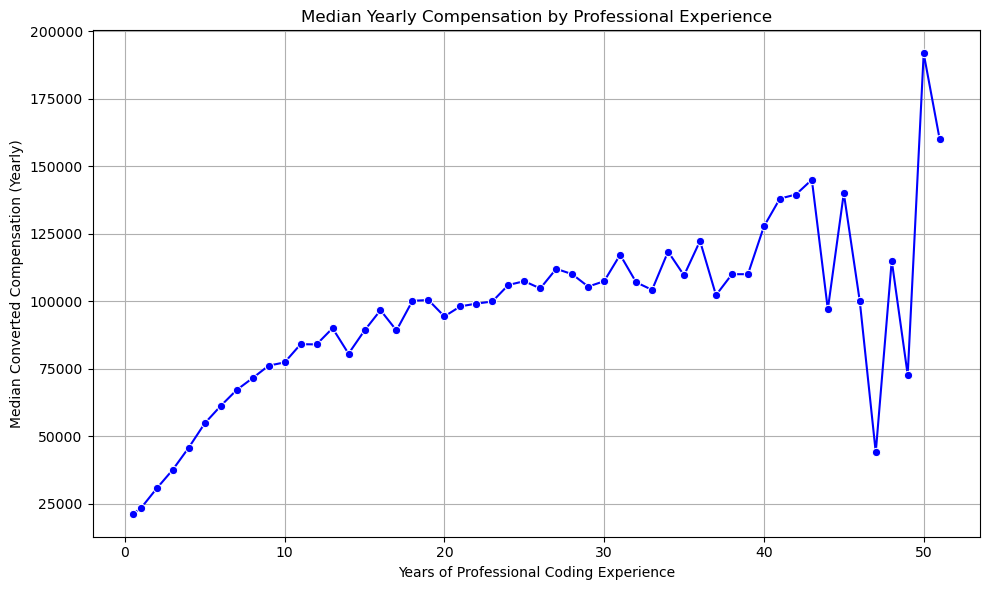

In [10]:
# Ensure 'YearsCodePro' and 'ConvertedCompYearly' exist and are not NaN
if 'YearsCodePro' in df.columns:
    df_exp_comp = df[['YearsCodePro', 'ConvertedCompYearly']].dropna()

    # Normalize textual experience entries
    df_exp_comp['YearsCodePro'] = df_exp_comp['YearsCodePro'].replace({
        'Less than 1 year': 0.5,
        'More than 50 years': 51
    })

    # Convert to numeric
    df_exp_comp['YearsCodePro'] = pd.to_numeric(df_exp_comp['YearsCodePro'], errors='coerce')
    df_exp_comp = df_exp_comp.dropna()

    # Group by experience and calculate median compensation
    median_comp_by_exp = df_exp_comp.groupby('YearsCodePro')['ConvertedCompYearly'].median()

    # Plot the line chart
    plt.figure(figsize=(10, 6))
    sns.lineplot(x=median_comp_by_exp.index, y=median_comp_by_exp.values, marker='o', color='blue')
    plt.title('Median Yearly Compensation by Professional Experience')
    plt.xlabel('Years of Professional Coding Experience')
    plt.ylabel('Median Converted Compensation (Yearly)')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    print("The dataset does not contain a 'YearsCodePro' column. Please specify an alternate experience-related column.")


In [ ]:
2.Line Chart of Job Satisfaction (JobSatPoints_6) Across Experience Levels
Create a line chart to explore trends in job satisfaction (JobSatPoints_6) based on experience level.

This chart will provide insight into how satisfaction correlates with experience over time

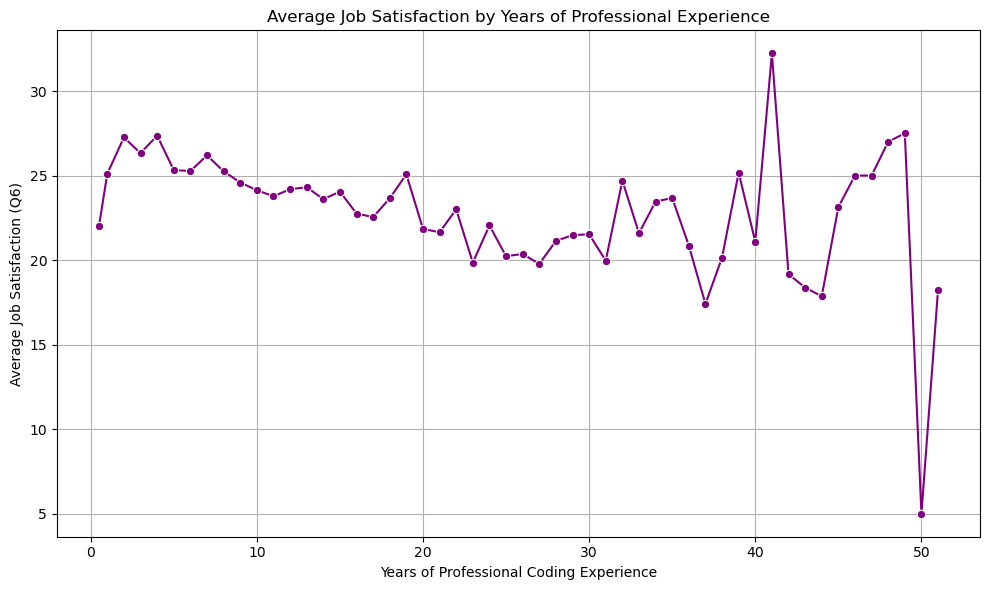

In [11]:
# Ensure required columns exist
if 'YearsCodePro' in df.columns and 'JobSatPoints_6' in df.columns:
    # Filter and clean data
    df_exp_sat = df[['YearsCodePro', 'JobSatPoints_6']].dropna()

    # Normalize textual values
    df_exp_sat['YearsCodePro'] = df_exp_sat['YearsCodePro'].replace({
        'Less than 1 year': 0.5,
        'More than 50 years': 51
    })

    # Convert to numeric
    df_exp_sat['YearsCodePro'] = pd.to_numeric(df_exp_sat['YearsCodePro'], errors='coerce')
    df_exp_sat = df_exp_sat.dropna()

    # Group by experience level and calculate mean satisfaction
    mean_job_sat_by_exp = df_exp_sat.groupby('YearsCodePro')['JobSatPoints_6'].mean()

    # Plot the chart
    plt.figure(figsize=(10, 6))
    sns.lineplot(x=mean_job_sat_by_exp.index, y=mean_job_sat_by_exp.values, marker='o', color='purple')
    plt.title('Average Job Satisfaction by Years of Professional Experience')
    plt.xlabel('Years of Professional Coding Experience')
    plt.ylabel('Average Job Satisfaction (Q6)')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

else:
    print("Required columns ('YearsCodePro' and 'JobSatPoints_6') are missing in the dataset.")